In [1]:
# Decision Tree, Random Forest, and Bagging

In [2]:
# code to mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change directory to where titanic.csv is located
%cd drive/MyDrive/'Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [4]:
# import common libraries
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
url = "https://raw.githubusercontent.com/ben-phillips-5227/data-analyst-portfolio/main/projects/Titanic_RandomForest/data/titanic.csv"
titan = pd.read_csv(url)

In [6]:
# Prepare dataset

titan = titan.drop(["Name"], axis = 1)
titan = titan.dropna()

# preparing the dependent and independent variables
# Dummy coding using pd.get_dummies() and checking dtypes of coded variables

titan = pd.get_dummies(titan, drop_first = True, dtype = int)

# make y (dependent variable) as np.array
y = np.array(titan["Survival_Survived"])

# make x a dataframe subset with independent variables
X = titan[["Age", "Gender_Male", "Class_2nd", "Class_3rd", "Fare"]]

# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=63)


In [7]:
# Decision tree with gini index
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier using Gini index
MyTree = DecisionTreeClassifier(criterion='gini', random_state=61)

# Train the model
MyTree.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred_dt = MyTree.predict(X_test)


In [8]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

In [9]:
# Decision tree with pruned to level 4 with gini index
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier using Gini index
MyTree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=61)

# Train the model
MyTree.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred_dt = MyTree.predict(X_test)

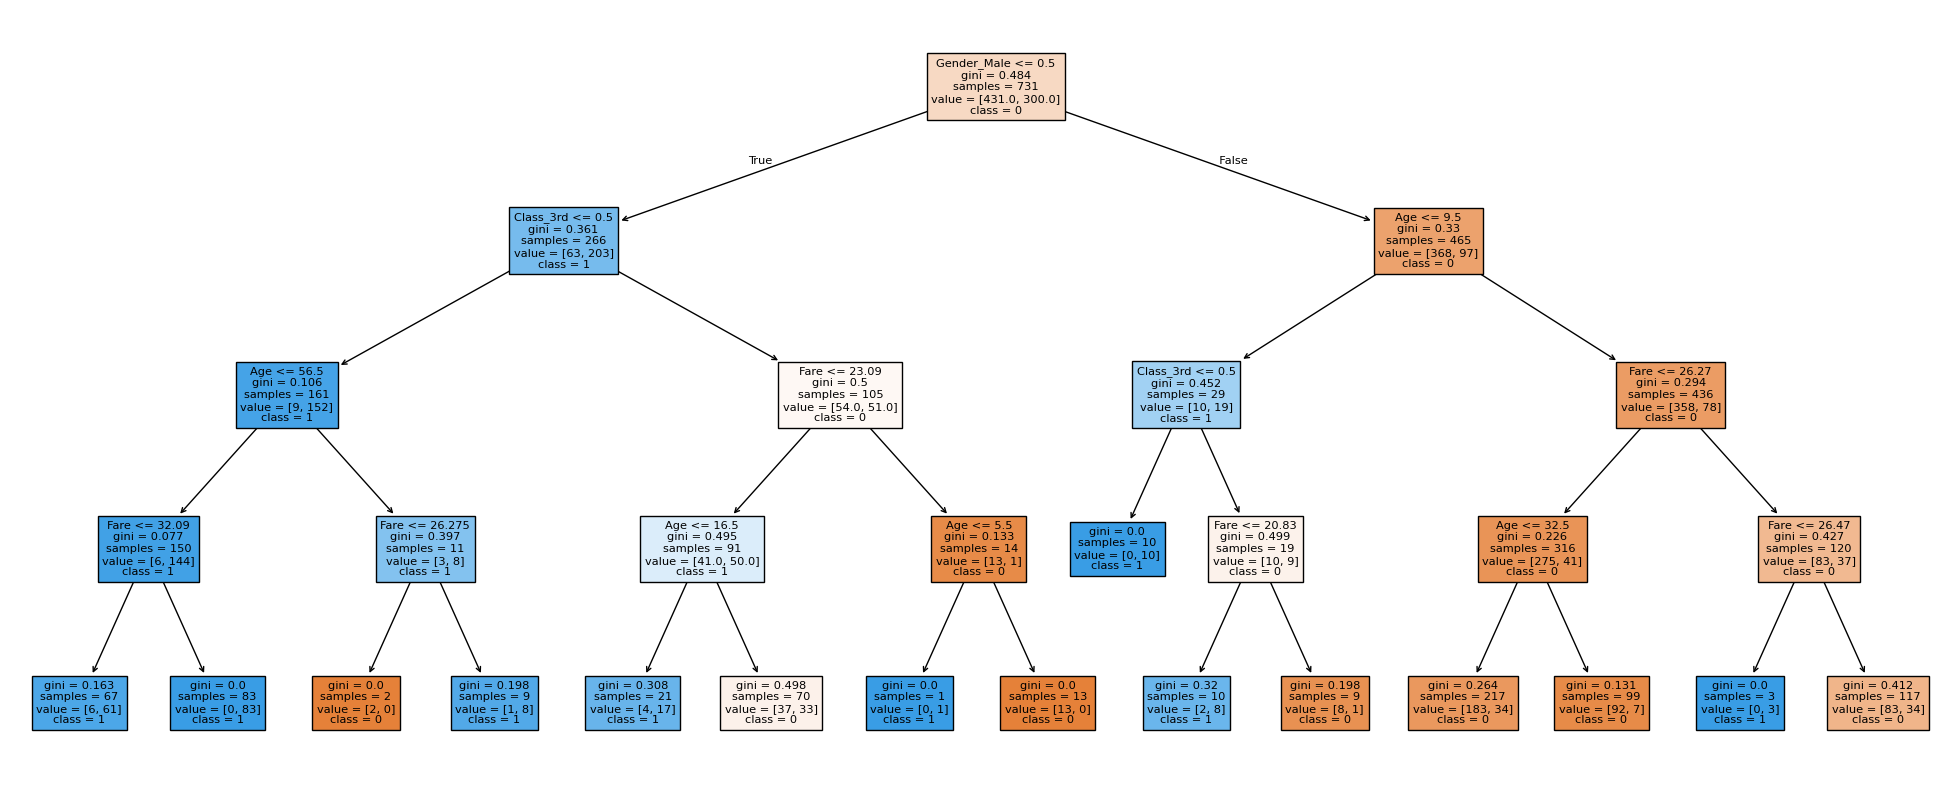

In [10]:
# plot the tree
plt.figure(figsize = (25, 10))
plot_tree(MyTree,
    feature_names = list(X_train.columns),
    class_names = MyTree.classes_.astype(str).tolist(),
    filled = True)
plt.show()

In [11]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_dt)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.802547770700637

Confusion Matrix:
 [[172  15]
 [ 47  80]]


In [12]:
# Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a Bagging Classifier with a Decision Tree
bagging_MyTree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                                max_samples=1.0, random_state=42)

# Train the model
bagging_MyTree.fit(X_train, y_train)

# Model predictions
y_pred_bag = bagging_MyTree.predict(X_test)

In [13]:
# Calculate accuracy and confusion matrix of Bagging
accuracy = metrics.accuracy_score(y_test, y_pred_bag)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_bag)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.767515923566879

Confusion Matrix:
 [[145  42]
 [ 31  96]]


In [14]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
# n_estimators = number of trees to create
# criterion = ""gini", "entropy", "log_loss"} default="gini"
# max_features = {"sqrt", "log2", "None"} default = "sqrt"
MyRF = RandomForestClassifier(n_estimators=1000, random_state=63)

# Train the model
MyRF.fit(X_train, y_train)

# Model predictions
y_pred_rf = MyRF.predict(X_test)

In [15]:
# Calculate accuracy of Random Forest
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.7834394904458599

Confusion Matrix:
 [[149  38]
 [ 30  97]]
